In [150]:
import pandas as pd
import numpy as np

In [151]:
atributes = [ 'Class', 'age', 'menopause', 'tumor-size' ,'inv-nodes', 'node-caps', 'deg-malig' ,'breast', 'breast-quad', 'irradiat']
missing = [np.nan , None , "" , "?"]
df = pd.read_csv('./data/breast-cancer.csv', names=atributes, na_values=missing) 
print(df.head())

                  Class    age menopause tumor-size inv-nodes node-caps  \
0  no-recurrence-events  30-39   premeno      30-34       0-2        no   
1  no-recurrence-events  40-49   premeno      20-24       0-2        no   
2  no-recurrence-events  40-49   premeno      20-24       0-2        no   
3  no-recurrence-events  60-69      ge40      15-19       0-2        no   
4  no-recurrence-events  40-49   premeno        0-4       0-2        no   

   deg-malig breast breast-quad irradiat  
0          3   left    left_low       no  
1          2  right    right_up       no  
2          2   left    left_low       no  
3          2  right     left_up       no  
4          2  right   right_low       no  


In [152]:
for i in df:
    print(df[i].unique())
print(df.size)


['no-recurrence-events' 'recurrence-events']
['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
['premeno' 'ge40' 'lt40']
['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
['no' 'yes' nan]
[3 2 1]
['left' 'right']
['left_low' 'right_up' 'left_up' 'right_low' 'central' nan]
['no' 'yes']
2860


In [153]:
for i in df:
    print('Sum values for {} : \n {} '.format(i, df[i].value_counts()))
    print('=='*10)

Sum values for Class : 
 no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64 
Sum values for age : 
 50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64 
Sum values for menopause : 
 premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64 
Sum values for tumor-size : 
 30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: tumor-size, dtype: int64 
Sum values for inv-nodes : 
 0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64 
Sum values for node-caps : 
 no     222
yes     56
Name: node-caps, dtype: int64 
Sum values for deg-malig : 
 2    130
3     85
1     71
Name: deg-malig, dtype: int64 
Sum values for breast : 
 left     152
right    134
Name: breast, dtype: int64 
Sum values for breast-quad : 
 left_low     110
left_up       97
right_up

In [154]:
for i in df:
    print("sum of nans in {} : {} ".format(i,df[i].isna().sum() ))
print(df)

sum of nans in Class : 0 
sum of nans in age : 0 
sum of nans in menopause : 0 
sum of nans in tumor-size : 0 
sum of nans in inv-nodes : 0 
sum of nans in node-caps : 8 
sum of nans in deg-malig : 0 
sum of nans in breast : 0 
sum of nans in breast-quad : 1 
sum of nans in irradiat : 0 
                    Class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence

In [155]:
#mono 9 nan exei as ta diagrapsoume 
df["node-caps"].dropna(how='any', inplace=True)
df["breast-quad"].dropna(how='any', inplace=True)

print(df["node-caps"].unique(), df["breast-quad"].unique())



['no' 'yes'] ['left_low' 'right_up' 'left_up' 'right_low' 'central']


### convert the strings (ages, tumor-size,inv-nodes) into numericals

# # Machine Learning

In [156]:
# '30-39' '40-49' '60-69' '50-59' '70-79' '20-29'
ages = []
for row in df["age"]:
    if row == "20-29":
        ages.append(0)
    elif row == "30-39":
        ages.append(1)
    elif row == "40-49":
        ages.append(2)
    elif row == "50-59":
        ages.append(3)
    elif row == "60-69":
        ages.append(4)
    elif row == "70-79":
        ages.append(5)
    else :
        ages.append(6)
        
# print(ages)
ages_df = pd.DataFrame(ages)
df["age"] = ages_df
# print(df["ages"])

### gia tumor-size
sizes_table = []
for row in df["tumor-size"]:
#     print(row)
    if row == '0-4':
        sizes_table.append(0)
    elif row == '5-9':
        sizes_table.append(1)
    elif row == '10-14':
        sizes_table.append(2)
    elif row == '15-19':
        sizes_table.append(3)
    elif row == '20-24':
        sizes_table.append(4)
    elif row == '25-29':
        sizes_table.append(5)
    elif row == '30-34':
        sizes_table.append(6)       
    elif row == '35-39':
        sizes_table.append(7)       
    elif row == '40-44':
        sizes_table.append(8)
    elif row == '45-49':
        sizes_table.append(9)
    elif row == '50-54' :
        sizes_table.append(10)
        
# print(sizes_table)
sizes_table_df = pd.DataFrame(sizes_table)
df["tumor-size"] = sizes_table_df
# print(df["tumor-size"])


### '0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26'
### gia inv-nodes
table = []
for row in df["inv-nodes"]:
#     print(row)
    if row == '0-2':
        table.append(0)
    elif row == '3-5':
        table.append(1)
    elif row == '6-8':
        table.append(2)
    elif row == '9-11':
        table.append(3)
    elif row == '12-14':
        table.append(4)
    elif row == '15-17':
        table.append(5)
    elif row == '24-26':
        table.append(6)       
    
        
# print(sizes_table)
table_df = pd.DataFrame(table)
df["inv-nodes"] = table_df
# print(df["tumor-size"])
del df['irradiat']

breast_table = []
for row in df["breast"]:
#     print(row)
    if row == 'left':
        breast_table.append(0)
    elif row == 'right':
        breast_table.append(1)

# print(breast_table)
breast_table_df = pd.DataFrame(breast_table)
df["breast"] = breast_table_df


df["node-caps"] = df["node-caps"].replace("yes",1)
df["node-caps"] = df["node-caps"].replace("no",0)

df["menopause"] = df["menopause"].replace("premeno",0)
df["menopause"] = df["menopause"].replace("ge40",1)
df["menopause"] = df["menopause"].replace("lt40",2)

df["Class"] = df["Class"].replace("no-recurrence-events", 0)
df["Class"] = df["Class"].replace("recurrence-events", 1)

df["breast-quad"] = df["breast-quad"].replace("left_low",0)
df["breast-quad"] = df["breast-quad"].replace("right_up",1)
df["breast-quad"] = df["breast-quad"].replace("left_up",2)
df["breast-quad"] = df["breast-quad"].replace("right_low",3)
df["breast-quad"] = df["breast-quad"].replace("central",4)

# df['breast-quad'] = df['breast-quad'].astype(integer)
# df['node-caps'] = df['node-caps'].astype(int)
df = df.fillna(200)

# df["node-caps"].dropna(how='any', inplace=True)
# df["breast-quad"].dropna(how='any', inplace=True)

print(df["node-caps"].unique(), df["breast-quad"].unique())

df['breast-quad'] = df['breast-quad'].astype(np.int64)
df['node-caps'] = df['node-caps'].astype(np.int64)

    
    


[  0.   1. 200.] [  0.   1.   2.   3.   4. 200.]


In [157]:
# print(df.head())
print(df["node-caps"].unique())
df.dtypes

[  0   1 200]


Class          int64
age            int64
menopause      int64
tumor-size     int64
inv-nodes      int64
node-caps      int64
deg-malig      int64
breast         int64
breast-quad    int64
dtype: object

### svm

In [158]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

data = df[["age", "menopause", "tumor-size" , "inv-nodes" ,"node-caps", "deg-malig" , "breast", "breast-quad"]]
# for i in full_dataset:
#     print(full_dataset[i])

res = df["Class"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, res, test_size=0.5,random_state=30) # 80% training and 20% test



#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7062937062937062


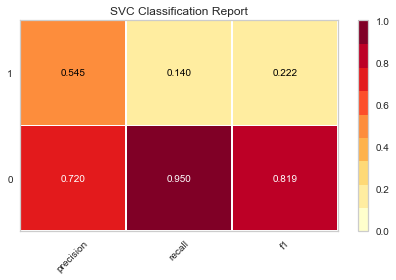

In [159]:
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(clf)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data
